In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-08-21 05:49:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.251.18.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  29.0MB/s    in 2.3s    

2023-08-21 05:49:21 (29.0 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

In [ ]:
local_zip = '/content/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

In [ ]:
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# 기본 경로
base_dir = '/content/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
print(train_dir) # /content/cats_and_dogs_filtered/train
print(validation_dir) # /content/cats_and_dogs_filtered/validation

/content/cats_and_dogs_filtered/train
/content/cats_and_dogs_filtered/validation


In [ ]:
# 훈련에 사용되는 개, 고양이 디렉토리 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir) # /content/cats_and_dogs_filtered/train/cats
print(train_dogs_dir) # /content/cats_and_dogs_filtered/train/dogs

/content/cats_and_dogs_filtered/train/cats
/content/cats_and_dogs_filtered/train/dogs


In [ ]:
# 검증에 사용되는 개, 고양이 디렉토리 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir) # /content/cats_and_dogs_filtered/validation/cats
print(validation_dogs_dir) # /content/cats_and_dogs_filtered/validation/dogs

/content/cats_and_dogs_filtered/validation/cats
/content/cats_and_dogs_filtered/validation/dogs


In [ ]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames[:5])
print(train_dogs_fnames[:5])

['cat.878.jpg', 'cat.864.jpg', 'cat.249.jpg', 'cat.692.jpg', 'cat.426.jpg']
['dog.236.jpg', 'dog.802.jpg', 'dog.69.jpg', 'dog.559.jpg', 'dog.503.jpg']


In [ ]:
print('학습용 고양이 사진의 수: ', len(train_cats_fnames))
print('학습용 강아지 사진의 수: ', len(train_dogs_fnames))

학습용 고양이 사진의 수:  1000
학습용 강아지 사진의 수:  1000


In [ ]:
validation_cats_fnames = os.listdir(validation_cats_dir)
validation_dogs_fnames = os.listdir(validation_dogs_dir)

print(validation_cats_fnames[:5])
print(validation_dogs_fnames[:5])

['cat.2439.jpg', 'cat.2335.jpg', 'cat.2356.jpg', 'cat.2095.jpg', 'cat.2137.jpg']
['dog.2001.jpg', 'dog.2354.jpg', 'dog.2371.jpg', 'dog.2425.jpg', 'dog.2183.jpg']


In [ ]:
print('검증용 고양이 사진의 수: ', len(validation_cats_fnames))
print('검증용 강아지 사진의 수: ', len(validation_dogs_fnames))

검증용 고양이 사진의 수:  500
검증용 강아지 사진의 수:  500


<function matplotlib.pyplot.show(close=None, block=None)>

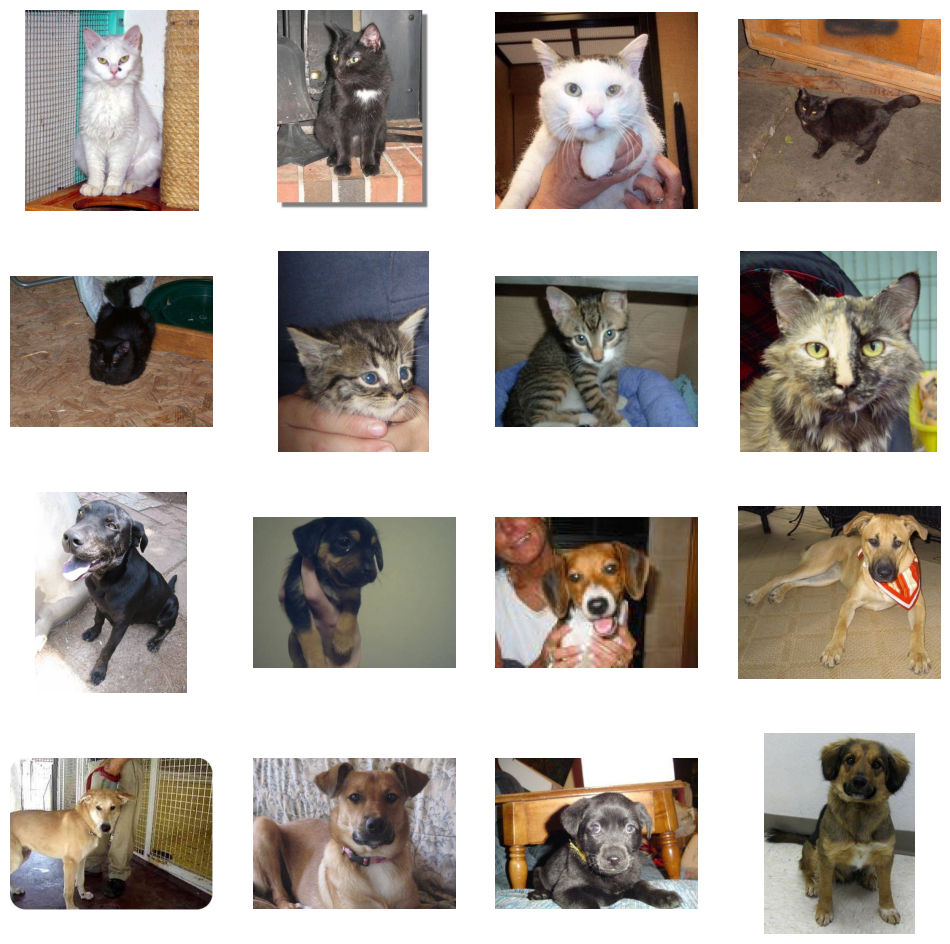

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cats_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 255)
validation_datagen = ImageDataGenerator(rescale = 1. / 255)
# 이미지 픽셀을 0에서 1사이의 값으로 스케일을 조정한다.

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    target_size = (150, 150),
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size = 32,
                                                              target_size = (150, 150),
                                                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters = 75, kernel_size = 3, padding = 'same', input_shape = (150, 150, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 75, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 150, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 150, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 220, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 220, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                        

In [ ]:
def get_step(train_len, batch_size):
  if(train_len % batch_size > 0):
    return train_len // batch_size + 1
  else:
    return train_len // batch_size

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = get_step(2000, 32),
                    epochs = 1,
                    validation_data = validation_generator)

63/63 [==============================] - 457s 7s/step - loss: 0.6725 - acc: 0.5705 - val_loss: 0.6338 - val_acc: 0.6490


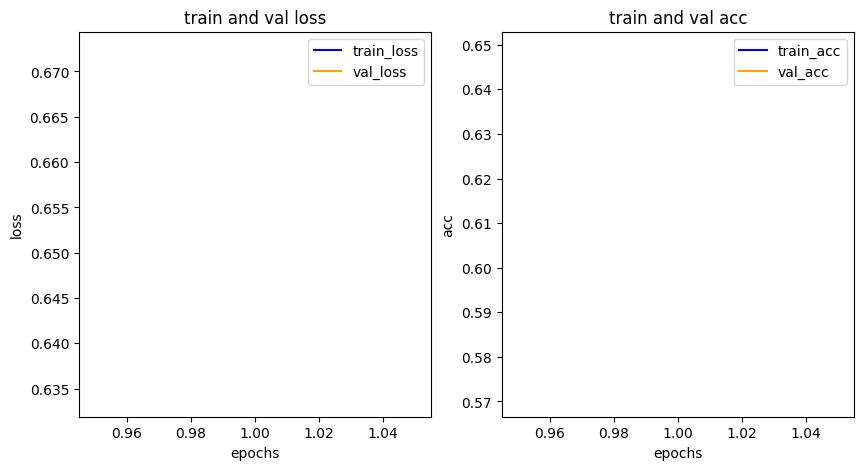

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

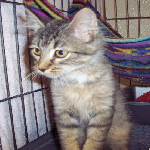

In [ ]:
img = image.load_img('/content/cats_and_dogs_filtered/train/cats/cat.2.jpg', target_size = (150, 150))
img

In [ ]:
x = image.img_to_array(img) / 255
print('전', x.shape)
images = np.expand_dims(x, axis=0)
print('후', images.shape)

전 (150, 150, 3)
후 (1, 150, 150, 3)


In [ ]:
classes = model.predict(images, batch_size=10)
classes

1/1 [==============================] - 0s 203ms/step


array([[0.5009385]], dtype=float32)

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def pred(fname):
  img=image.load_img(fname, target_size = (150, 150))
  plt.imshow(img)

  x=image.img_to_array(img)/ 255
  images = np.expand_dims(x, axis = 0)

  classes = model.predict(images, batch_size = 10)

  print(classes[0])

  if classes[0] > 0.5:
    print(fname.split('/')[-1] + "사진은 강아지 입니다.")
  else:
    print(fname.split('/')[-1] + "사진은 고양이 입니다.")

In [ ]:
files.upload()

{}

1/1 [==============================] - 0s 66ms/step
[0.49793682]
고양이_나이1.jpg사진은 고양이 입니다.


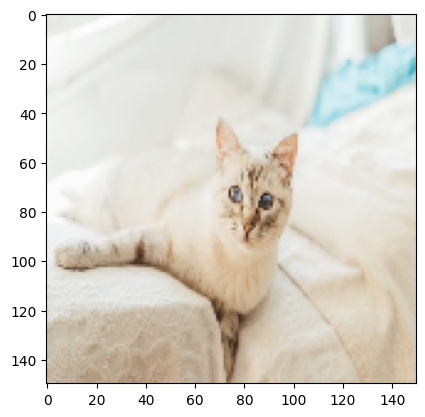

In [ ]:
pred('/content/고양이_나이1.jpg')